# **Model Notebook for _PEDESTRIAN DETECTION MODEL_**

In [1]:
    ## Import Libraries

    import pandas as pd

    import tensorflow as tf

    import numpy as np

    import seaborn as sns
    import cv2
    from matplotlib import pyplot as plt

    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Flatten
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.layers import Dense,MaxPooling2D,MaxPool2D,Conv2D
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input,Activation,Add
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
    from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.models import Sequential
    from tensorflow.keras import datasets, layers, models
    from tensorflow.keras import utils

    import scipy
    from scipy import stats
    from scipy.stats import norm

    from pathlib import Path
    import os.path

    import itertools

    import skimage

    import random

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_29152\3769437044.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### **Load Data**

In [ ]:
train_path="C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\train"
val_path="C:\\Users\\Abhinay\\OneDrive\Documents\\Pedestrian_Detection\\data\\validation"

In [ ]:
os.listdir(train_path)

['no pedestrian', 'pedestrian']

In [ ]:
os.listdir(val_path)

['no pedestrian', 'pedestrian']

In [ ]:
## Defining Pedestrian and Not Pedestrian Path

train_ped_path="C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\train\\pedestrian"
train_noped_path="C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\train\\no pedestrian"

In [ ]:
print("Displaying content of Pedestrian Folder")

os.listdir(train_ped_path)

Displaying content of Pedestrian Folder


['pic1 (1).jpg',
 'pic1 (10).jpg',
 'pic1 (100).jpg',
 'pic1 (101).jpg',
 'pic1 (102).jpg',
 'pic1 (103).jpg',
 'pic1 (104).jpg',
 'pic1 (105).jpg',
 'pic1 (106).jpg',
 'pic1 (107).jpg',
 'pic1 (108).jpg',
 'pic1 (109).jpg',
 'pic1 (11).jpg',
 'pic1 (110).jpg',
 'pic1 (111).jpg',
 'pic1 (112).jpg',
 'pic1 (113).jpg',
 'pic1 (114).jpg',
 'pic1 (115).jpg',
 'pic1 (116).jpg',
 'pic1 (117).jpg',
 'pic1 (118).jpg',
 'pic1 (119).jpg',
 'pic1 (12).jpg',
 'pic1 (120).jpg',
 'pic1 (121).jpg',
 'pic1 (122).jpg',
 'pic1 (123).jpg',
 'pic1 (124).jpg',
 'pic1 (125).jpg',
 'pic1 (126).jpg',
 'pic1 (127).jpg',
 'pic1 (128).jpg',
 'pic1 (129).jpg',
 'pic1 (13).jpg',
 'pic1 (130).jpg',
 'pic1 (131).jpg',
 'pic1 (132).jpg',
 'pic1 (133).jpg',
 'pic1 (134).jpg',
 'pic1 (135).jpg',
 'pic1 (136).jpg',
 'pic1 (137).jpg',
 'pic1 (138).jpg',
 'pic1 (139).jpg',
 'pic1 (14).jpg',
 'pic1 (140).jpg',
 'pic1 (141).jpg',
 'pic1 (142).jpg',
 'pic1 (143).jpg',
 'pic1 (144).jpg',
 'pic1 (145).jpg',
 'pic1 (146).jpg',


In [ ]:
print("Displaying content of Non-Pedestrian Folder")

os.listdir(train_noped_path)

Displaying content of Non-Pedestrian Folder


['train (1).jpg',
 'train (10).jpg',
 'train (100).jpg',
 'train (101).jpg',
 'train (102).jpg',
 'train (103).jpg',
 'train (104).jpg',
 'train (105).jpg',
 'train (106).jpg',
 'train (107).jpg',
 'train (108).jpg',
 'train (109).jpg',
 'train (11).jpg',
 'train (110).jpg',
 'train (111).jpg',
 'train (112).jpg',
 'train (113).jpg',
 'train (114).jpg',
 'train (115).jpg',
 'train (116).jpg',
 'train (117).jpg',
 'train (118).jpg',
 'train (119).jpg',
 'train (12).jpg',
 'train (120).jpg',
 'train (121).jpg',
 'train (122).jpg',
 'train (123).jpg',
 'train (124).jpg',
 'train (125).jpg',
 'train (126).jpg',
 'train (127).jpg',
 'train (128).jpg',
 'train (129).jpg',
 'train (13).jpg',
 'train (130).jpg',
 'train (131).jpg',
 'train (132).jpg',
 'train (133).jpg',
 'train (134).jpg',
 'train (135).jpg',
 'train (136).jpg',
 'train (137).jpg',
 'train (138).jpg',
 'train (139).jpg',
 'train (14).jpg',
 'train (140).jpg',
 'train (141).jpg',
 'train (142).jpg',
 'train (143).jpg',
 'train

In [ ]:
## Access an image from Pedestrain

print("Accessing an image of Pedestrian")
os.listdir(train_ped_path)[10]

Accessing an image of Pedestrian


'pic1 (108).jpg'

In [ ]:
## Access an Non Pedestrian Image
 
print("Accessing an image of Non Pedestrian")
os.listdir(train_noped_path)[16]

Accessing an image of Non Pedestrian


'train (113).jpg'

#### **Visualization**

In [ ]:
from skimage.io import imread

In [ ]:
'''Displaying a Pedestrian Image'''

pedestrian="C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\train\\pedestrian\\pic_058.jpg"
imread(pedestrian).shape

(168, 301, 3)

Displaying Image


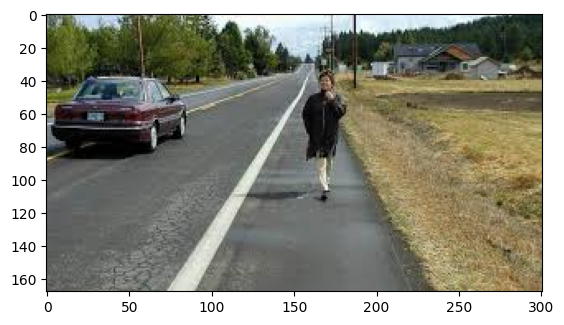

In [ ]:
print("Displaying Image")
plt.imshow(imread(pedestrian))

In [ ]:
'''Displaying a Non-Pedestrian Image'''

nopedestrian="C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\train\\no pedestrian\\train (44).jpg"
imread(nopedestrian).shape

(183, 275, 3)

Displaying Image


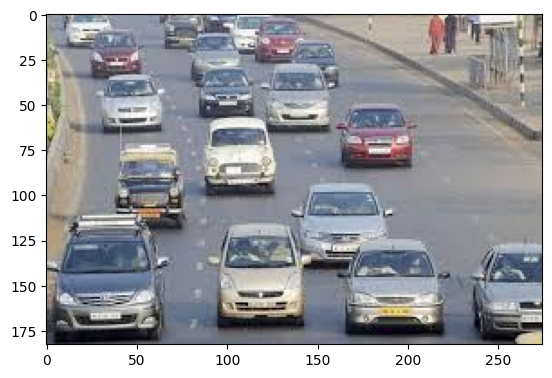

In [ ]:
print("Displaying Image")
plt.imshow(imread(nopedestrian))

In [ ]:
print("No.of Train Pedestrian Images")
len(os.listdir("C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\train\\pedestrian"))

No.of Train Pedestrian Images


631

In [ ]:
print("No.of Train Non-Pedestrian Images")
len(os.listdir("C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\train\\no pedestrian"))

No.of Train Non-Pedestrian Images


631

In [ ]:
print("No.of Validation Pedestrian Images")
len(os.listdir("C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\validation\\pedestrian"))

No.of Validation Pedestrian Images


177

In [ ]:
print("No.of Validation Non-Pedestrian Images")
len(os.listdir("C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\validation\\pedestrian"))

No.of Validation Non-Pedestrian Images


177

In [ ]:
## Converting images and assigned labels into a Dataframe 

train_folder = "C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\train"
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df = pd.DataFrame(all_data)
df

,Path,Label
0,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
1,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
2,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
3,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
4,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
...,...,...
1257,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,pedestrian
1258,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,pedestrian
1259,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,pedestrian
1260,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,pedestrian


C:\Users\Abhinay\AppData\Local\Temp\ipykernel_25644\2541504545.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(vc.index), y = vc,palette="rocket")


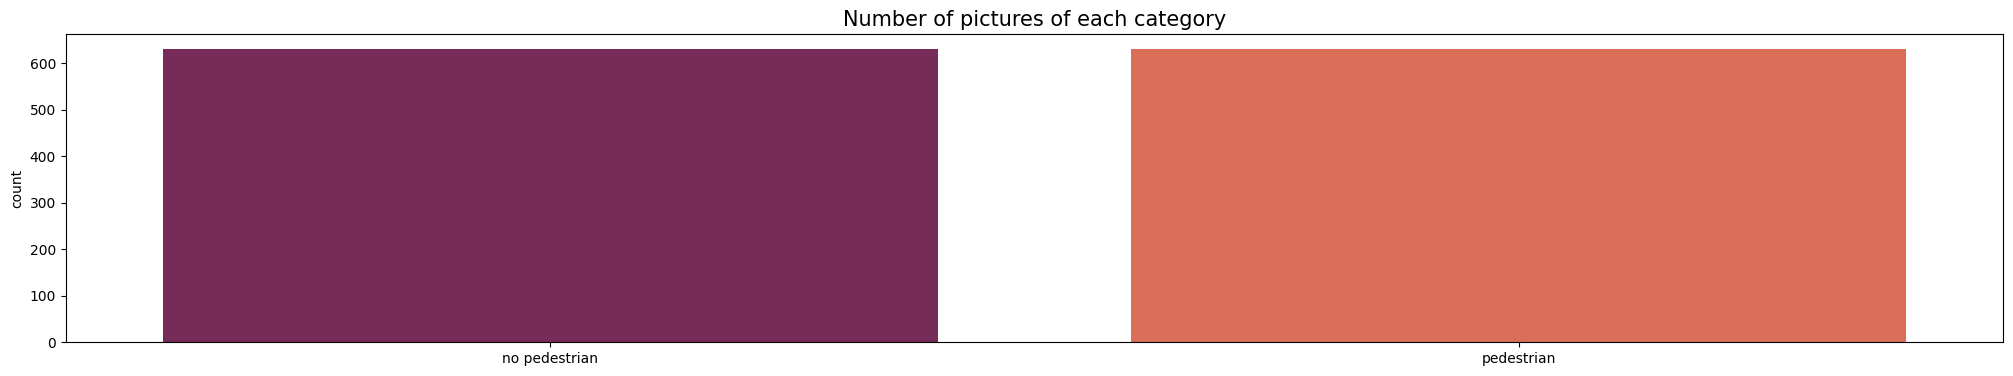

In [ ]:
## Plotting count of images per each label

vc = df['Label'].value_counts()
plt.figure(figsize=(25,4))
sns.barplot(x = sorted(vc.index), y = vc,palette="rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
## Converting images and assigned labels into a Dataframe 

val_folder = "C:\\Users\\Abhinay\\OneDrive\\Documents\\Pedestrian_Detection\\data\\validation"
all_data = []
for folder in os.listdir(val_folder):
    
    label_folder = os.path.join(val_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df1 = pd.DataFrame(all_data)
df1

,Path,Label
0,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
1,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
2,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
3,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
4,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,no pedestrian
...,...,...
349,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,pedestrian
350,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,pedestrian
351,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,pedestrian
352,C:\Users\Abhinay\OneDrive\Documents\Pedestrian...,pedestrian


C:\Users\Abhinay\AppData\Local\Temp\ipykernel_25644\372231287.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(vc.index), y = vc,palette="Spectral")


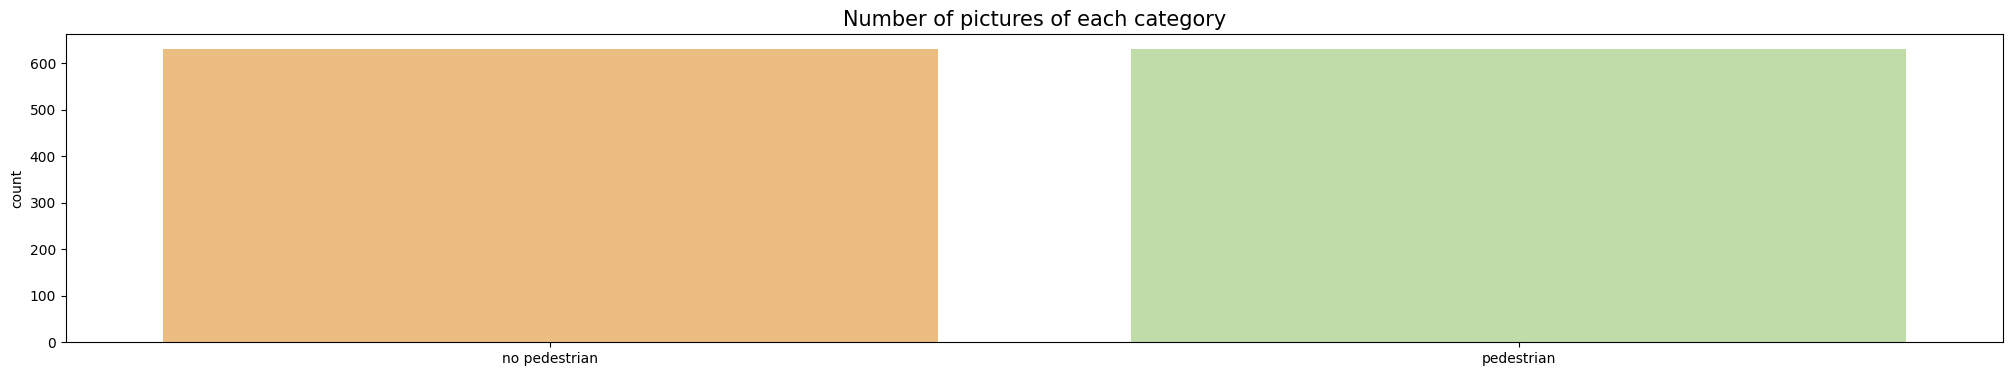

In [ ]:
## Plotting count of images per each label

vc1 = df1['Label'].value_counts()
plt.figure(figsize=(25,4))
sns.barplot(x = sorted(vc.index), y = vc,palette="Spectral")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

#### **Data Pre-processing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
imread(pedestrian).max()

255

In [ ]:
'''Reshaping is done in cells'''
image_gen=ImageDataGenerator(rescale=1/255,shear_range=0.1,zoom_range=0.1,fill_mode='nearest')

In [ ]:
image_gen.flow_from_directory(train_path)

Found 1262 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(val_path)

Found 354 images belonging to 2 classes.


In [ ]:
image_shape=(200,200,3)

#### **Define Neural Network (CNN)**

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
'''Compiling Model'''

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

#### **Model Fitting and Training**

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=16,class_mode='binary')

Found 1262 images belonging to 2 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_path,target_size=image_shape[:2],color_mode='rgb', batch_size=16,class_mode='binary',shuffle=False)

Found 354 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'no pedestrian': 0, 'pedestrian': 1}

In [ ]:
history=model.fit(train_image_gen,epochs=10,batch_size=64,validation_data=val_image_gen,validation_split=0.8,callbacks=[early_stop])

Epoch 1/10




79/79 [==============================] - 31s 379ms/step - loss: 0.7007 - accuracy: 0.5745 - val_loss: 0.6831 - val_accuracy: 0.6384
Epoch 2/10
79/79 [==============================] - 44s 551ms/step - loss: 0.6226 - accuracy: 0.6759 - val_loss: 0.5563 - val_accuracy: 0.7288
Epoch 3/10
79/79 [==============================] - 38s 474ms/step - loss: 0.4649 - accuracy: 0.7932 - val_loss: 0.5985 - val_accuracy: 0.7429
Epoch 4/10
79/79 [==============================] - 21s 271ms/step - loss: 0.4014 - accuracy: 0.8170 - val_loss: 0.4679 - val_accuracy: 0.7684
Epoch 5/10
79/79 [==============================] - 24s 305ms/step - loss: 0.3700 - accuracy: 0.8257 - val_loss: 0.4019 - val_accuracy: 0.8220
Epoch 6/10
79/79 [==============================] - 24s 300ms/step - loss: 0.3237 - accuracy: 0.8661 - val_loss: 0.3669 - val_accuracy: 0.8503
Epoch 7/10
79/79 [==============================] - 24s 300ms/step - loss: 0.3413 - accuracy: 0.8487 - val_loss: 0.3872 - val_accuracy: 0.8333
Epoch 8/1

In [ ]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.700655,0.574485,0.683054,0.638418
1,0.622613,0.675911,0.556279,0.728814
2,0.464945,0.793185,0.598491,0.742938
3,0.401424,0.816957,0.467878,0.768362
4,0.370005,0.825674,0.401897,0.822034
5,0.323750,0.866086,0.366908,0.850282
6,0.341335,0.848653,0.387238,0.833333
7,0.258272,0.883518,0.358730,0.861582
8,0.246208,0.904120,0.319400,0.875706
9,0.208868,0.912837,0.361742,0.813559


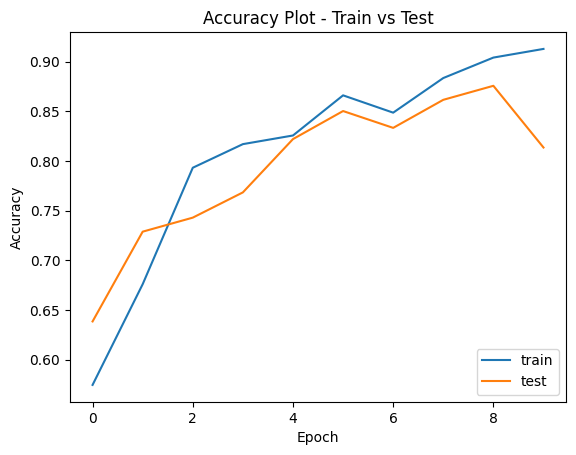

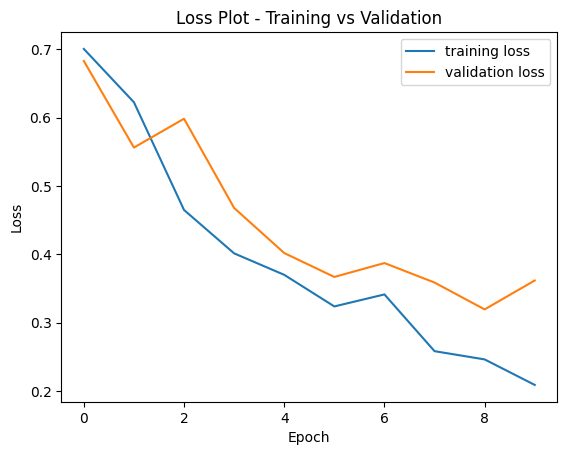

In [ ]:
plt.plot(metrics['accuracy'])  # Plot training accuracy
plt.plot(metrics['val_accuracy'])  # Plot testing accuracy
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy Plot - Train vs Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plotting training and validation loss
plt.plot(metrics['loss'])  # Plots training loss
plt.plot(metrics['val_loss'])  # Plots validation loss
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.title('Loss Plot - Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<Axes: >

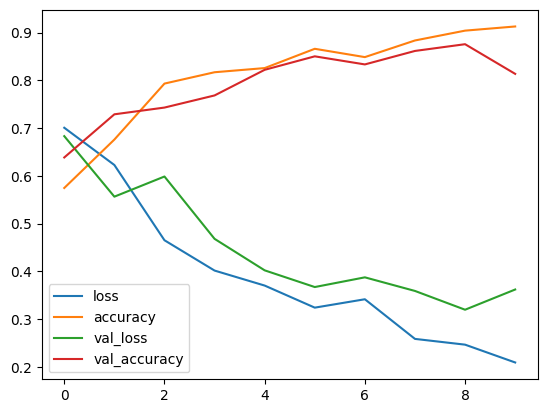

In [ ]:
metrics.plot()

#### **Model Evaluation**

In [ ]:
# Model Evaluation
evaluate_metrics = model.evaluate(val_image_gen,verbose=0)

# Print the evaluation results
print("Evaluation Accuracy = {:.2f}%".format(evaluate_metrics[1] * 100))
print("Evaluation Loss = {:.6f}".format(evaluate_metrics[0]))

Evaluation Accuracy = 83.62%
Evaluation Loss = 0.359645


In [ ]:
pred=model.predict(val_image_gen)

23/23 [==============================] - 3s 137ms/step


In [ ]:
pred[:5]

array([[0.32878998],
       [0.21742599],
       [0.00172736],
       [0.2586582 ],
       [0.51499736]], dtype=float32)

In [ ]:
'''Considering aboove Probabilities: If prob>0.5 Consider as Pedestrian and prob<0.5 Consider as No Pedestrian'''

predictions=pred>0.5

In [ ]:
predictions[:5]

array([[False],
       [False],
       [False],
       [False],
       [ True]])

In [ ]:
val_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### **Classification Report and Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       177
           1       0.77      0.91      0.84       177

    accuracy                           0.82       354
   macro avg       0.83      0.82      0.82       354
weighted avg       0.83      0.82      0.82       354



<Axes: >

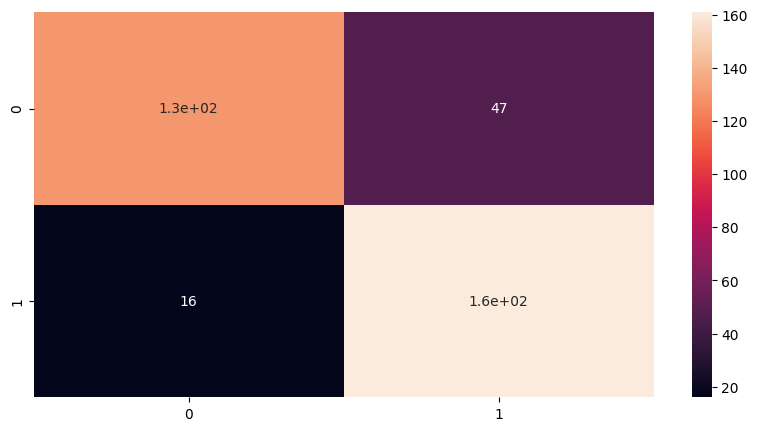

In [ ]:
results=confusion_matrix(val_image_gen.classes,predictions)
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(results,annot=True)

In [ ]:
## SAVE THE MODEL 

from keras.models import load_model
model.save('Pedestrian_Detection.h5')